In [1]:
from pandas import read_csv
from itertools import combinations
import matplotlib.pyplot as plt
import networkx as nx

# 读取数据

In [2]:
data_meta=read_csv("./练习数据Datasets/StudentsPerformance.csv")

# 根据成绩划分组

In [3]:
math_lower_than_60=data_meta[data_meta['math score']<60]

math_higher_than_60=data_meta[data_meta['math score']>=60]
math_between_60_and_85=math_higher_than_60[math_higher_than_60['math score']<85]

math_higher_than_85=data_meta[data_meta['math score']>=85]

math_list=(math_lower_than_60,math_between_60_and_85,math_higher_than_85)

In [4]:
reading_lower_than_60=data_meta[data_meta['reading score']<60]

reading_higher_than_60=data_meta[data_meta['reading score']>=60]
reading_between_60_and_85=reading_higher_than_60[reading_higher_than_60['reading score']<85]

reading_higher_than_85=data_meta[data_meta['reading score']>=85]

reading_list=(reading_lower_than_60,reading_between_60_and_85,reading_higher_than_85)

In [5]:
writing_lower_than_60=data_meta[data_meta['writing score']<60]

writing_higher_than_60=data_meta[data_meta['writing score']>=60]
writing_between_60_and_85=writing_higher_than_60[writing_higher_than_60['writing score']<85]

writing_higher_than_85=data_meta[data_meta['writing score']>=85]

writing_list=(writing_lower_than_60,writing_between_60_and_85,writing_higher_than_85)

In [6]:
all_list=math_list+writing_list+reading_list

In [7]:
def support(n:int,*args):
    if len(args)>1:
        count=0
        for i in range(n):
            count_in_j=0
            for j in args:
                if i in j.index:
                    count_in_j=count_in_j+1
            if count_in_j==len(args):
                count=count+1
        return count/n
    elif len(args)==1:
        args=args[0]
        return len(args)/n

In [8]:
def get_variable_name(variable):
    item_now=globals()
    for k,_ in item_now.items():
        if item_now[k] is variable:
            return k

In [9]:
result_list=[]

In [10]:
for i in combinations(all_list,2):
    if get_variable_name(i[0])[0:4]!=get_variable_name(i[1])[0:4]:
        support_now=support(1000,i[0],i[1])
        confidence_now=support_now/support(1000,i[0])
        lift_now=confidence_now/support(1000,i[1])
        if support_now>=0.1 and confidence_now>=0.5:
            result_list.append({'A':{get_variable_name(i[0])},'B':{get_variable_name(i[1])},"lift":lift_now})

In [11]:
for i in combinations(all_list,3):
    if get_variable_name(i[0])[0:4]!=get_variable_name(i[1])[0:4]!=get_variable_name(i[2])[0:4]:
        support_now=support(1000,i[0],i[1],i[2])
        if support_now>=0.1:
            confidence_now=support_now/support(1000,i[0],i[1])
            if confidence_now>=0.5:
                lift_now=confidence_now/support(1000,i[2])
                result_list.append({'A':{get_variable_name(i[0]),get_variable_name(i[1])},'B':{get_variable_name(i[2])},"lift":lift_now})

In [12]:
for i in combinations(all_list,3):
    if get_variable_name(i[0])[0:4]!=get_variable_name(i[1])[0:4]!=get_variable_name(i[2])[0:4]:
        support_now=support(1000,i[0],i[1],i[2])
        if support_now>=0.1:
            confidence_now=support_now/support(1000,i[0])
            if confidence_now>=0.5:
                lift_now=confidence_now/support(1000,i[1],i[2])
                result_list.append({'A':{get_variable_name(i[0])},'B':{get_variable_name(i[1]),get_variable_name(i[2])},"lift":lift_now})

In [13]:
result_list_sorted=sorted(result_list,key=lambda d: d["lift"],reverse = True)

In [14]:
for i,data in enumerate(result_list_sorted):
    for j,data_2 in enumerate(result_list_sorted):
        if i!=j and data["B"]==data_2["B"] and data_2["A"].issubset(data["A"]):
            result_list_sorted.pop(j)

In [15]:
for i in range(7):
    print(result_list_sorted[i]["A"],chr(8658),result_list_sorted[i]["B"],"lift=",result_list_sorted[i]["lift"])

{'writing_higher_than_85'} ⇒ {'reading_higher_than_85'} lift= 5.679012345679013
{'writing_lower_than_60', 'math_lower_than_60'} ⇒ {'reading_lower_than_60'} lift= 3.4954742806681875
{'math_lower_than_60'} ⇒ {'writing_lower_than_60', 'reading_lower_than_60'} lift= 2.535496957403651
{'math_lower_than_60'} ⇒ {'writing_lower_than_60'} lift= 2.3577889668697596
{'math_between_60_and_85', 'writing_between_60_and_85'} ⇒ {'reading_between_60_and_85'} lift= 1.5759267390077152
{'math_between_60_and_85'} ⇒ {'reading_between_60_and_85', 'writing_between_60_and_85'} lift= 1.3621577663323394
{'math_between_60_and_85'} ⇒ {'writing_between_60_and_85'} lift= 1.3087084148727983


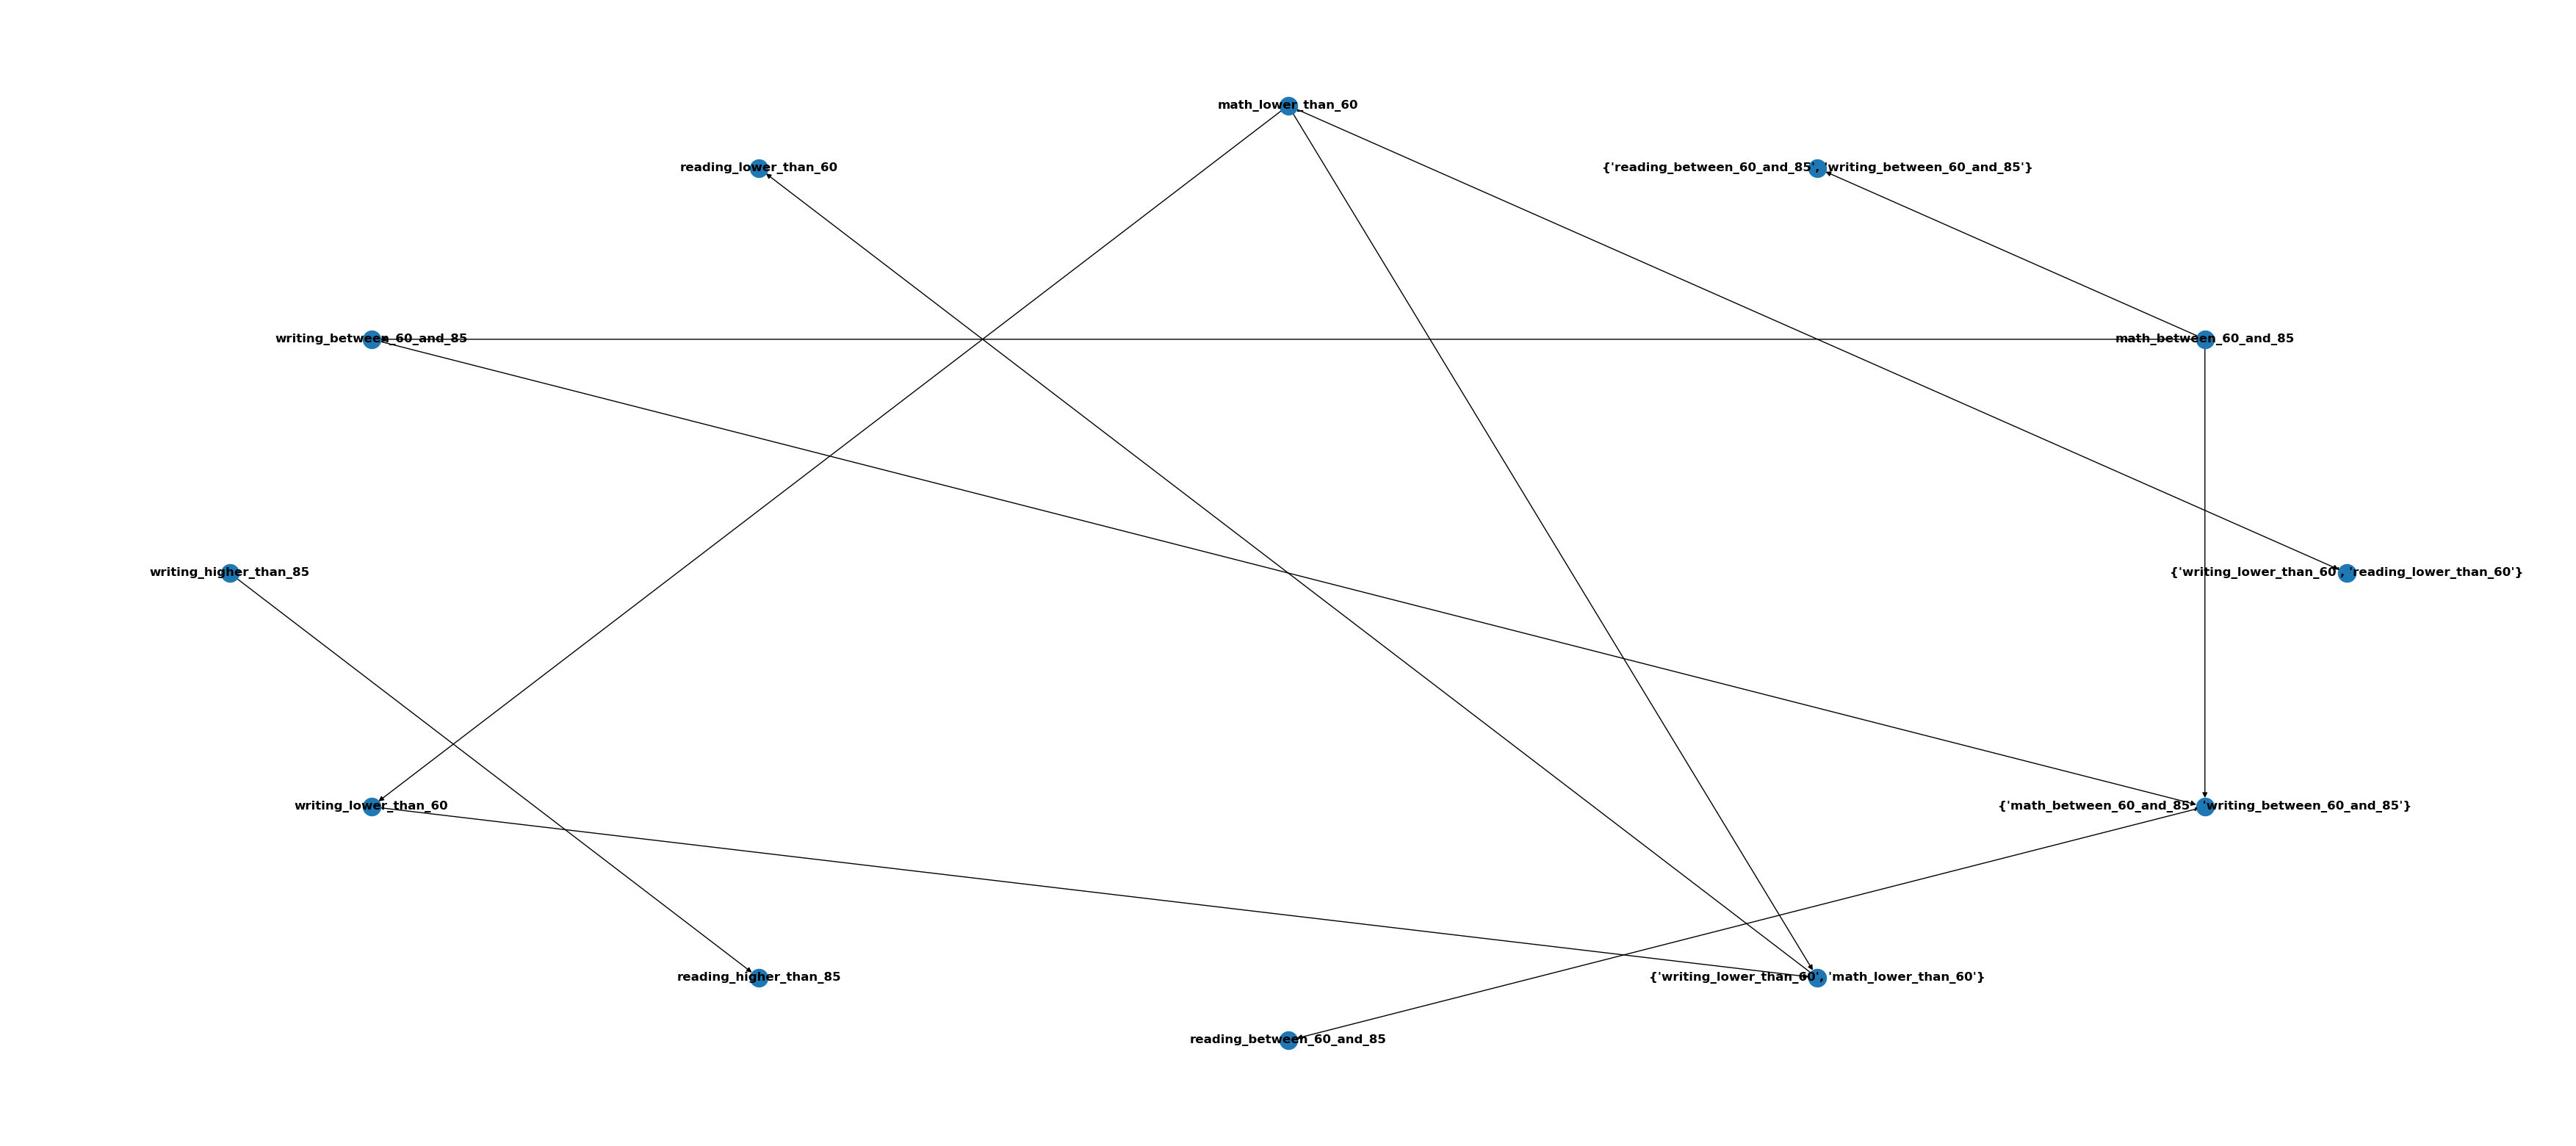

In [54]:
# 定义图的节点和边
nodes=set()
edges=[]
for i,data in enumerate(result_list_sorted):
    match (len(data["A"]),len(data["B"])):
        case(1,1):
            nodes.add(tuple(data["A"])[0])
            nodes.add(tuple(data["B"])[0])
            edges.append((tuple(data["A"])[0],tuple(data["B"])[0],data["lift"]))
        case(1,2):
            nodes.add(tuple(data["A"])[0])
            nodes.add(str(data["B"]))
            edges.append((tuple(data["A"])[0],str(data["B"]),data["lift"]))
        case(2,1):
            nodes.add(tuple(data["A"])[0])
            nodes.add(tuple(data["A"])[1])
            nodes.add(tuple(data["B"])[0])
            edges.append((tuple(data["A"])[0],str(data["A"]),data["lift"]))
            edges.append((tuple(data["A"])[1],str(data["A"]),data["lift"]))
            edges.append((str(data["A"]),tuple(data["B"])[0],data["lift"]))
        case(2,2):
            nodes.add(tuple(data["A"])[0])
            nodes.add(tuple(data["A"])[1])
            nodes.add(str(data["B"])[0])
            edges.append((tuple(data["A"])[0],str(data["A"]),data["lift"]))
            edges.append((tuple(data["A"])[1],str(data["A"]),data["lift"]))
            edges.append((str(data["A"]),str(data["B"]),data["lift"]))

 
plt.subplots(1, 1, figsize=(45, 20))
 
 
G2 = nx.DiGraph()
G2.add_nodes_from(nodes)
G2.add_weighted_edges_from(edges)
 
pos = nx.circular_layout(G2)

 
plt.subplot(111)
nx.draw(G2, pos, with_labels=True, font_weight='bold')
plt.xticks([])
plt.yticks([])
 
plt.show()